### Тема “Обучение с учителем”
#### Задание 1

In [11]:
import warnings

warnings.filterwarnings('ignore')

In [72]:
import numpy as np
import pandas as pd
import sklearn as skl

In [55]:
boston = skl.datasets.load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

In [56]:
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

In [95]:
X_train, X_test, y_train, y_test = skl.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
lr = skl.linear_model.LinearRegression()

In [97]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
y_pred = lr.predict(X_test)

In [133]:
check_test_lr = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test_lr["error"] = check_test_lr["y_pred"] - check_test_lr["y_test"]

check_test_lr.head()

,y_test,y_pred,error
173,23.6,22.846138,-0.753862
274,32.4,31.156114,-1.243886
491,13.6,16.297226,2.697226
72,22.8,23.821036,1.021036
452,16.1,17.212148,1.112148


In [101]:
skl.metrics.mean_squared_error(check_test_lr["y_test"], check_test_lr["y_pred"])

21.51744423117712

In [102]:
skl.metrics.mean_absolute_error(check_test_lr["y_test"], check_test_lr["y_pred"])

3.1627098714573902

In [103]:
skl.metrics.r2_score(check_test_lr["y_test"], check_test_lr["y_pred"]) 

0.7112260057484945

#### Задание 2

In [104]:
rfr = skl.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [122]:
rfr.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [123]:
y_pred = rfr.predict(X_test)

In [134]:
check_test_rfr = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

check_test_rfr["error"] = check_test_rfr["y_pred"] - check_test_rfr["y_test"]

check_test_rfr.head()

,y_test,y_pred,error
173,23.6,22.846138,-0.753862
274,32.4,31.156114,-1.243886
491,13.6,16.297226,2.697226
72,22.8,23.821036,1.021036
452,16.1,17.212148,1.112148


In [146]:
skl.metrics.mean_squared_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

9.31439570598467

In [147]:
skl.metrics.mean_absolute_error(check_test_rfr["y_test"], check_test_rfr["y_pred"])

2.0823358994024765

In [148]:
skl.metrics.r2_score(check_test_rfr["y_test"], check_test_rfr["y_pred"]) 

0.8749965273218174

##### Выводы
Я считаю, что в данном случае метод $RandomForestRegressor$ работает лучше, чем $LinearRegression$ - у него прогноз ближе к текущим значениям. Ключевые харрактеристики качества прогноза $mean\_squared\_error$ и $mean\_absolute\_error$ значительно ближе к 0 в случае с $RandomForestRegressor$ нежели с $LinearRegression$.
А также $r2\_score$ имеет показатель, более близкий к 1. 

#### Задание 3

In [144]:
print(rfr.feature_importances_)

[0.03211748 0.00154999 0.0070941  0.0011488  0.01436832 0.40270459
 0.01424477 0.06403265 0.00496762 0.01169177 0.01808961 0.0123114
 0.41567892]


In [141]:
print(rfr.feature_importances_.sum())

0.9999999999999999


In [150]:
print(rfr.feature_importances_.max())

0.4156789214509943


In [143]:
print(rfr.feature_importances_.min())

0.0011487958307451888


In [151]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

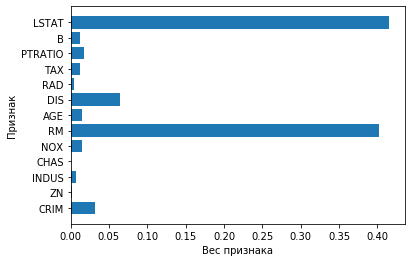

In [153]:
plt.barh(feature_names, rfr.feature_importances_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

max1 - LSTAT : % lower status of the population
max2 - RM : average number of rooms per dwelling

min - CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

#### Задание 4